# In this script the trained models from SHAPR are beeing applied on the RBC images provided by the Swiss Institute for Translational and Entrepreneurial Medicine (SITEM)

@article{waibel2022shapr, title={SHAPR predicts 3D cell shapes from 2D microscopic images}, author={Waibel, Dominik JE and Kiermeyer, Niklas and Atwell, Scott and Sadafi, Ario and Meier, Matthias and Marr, Carsten}, journal={Iscience}, pages={105298}, year={2022}, publisher={Elsevier} }

https://www.cell.com/iscience/fulltext/S2589-0042(22)01570-X?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS258900422201570X%3Fshowall%3Dtrue

In [2]:
# !pip3 install shapr 
# uncomment above code if shapr hasn't been installed yet

### Import dependencies

In [3]:
from shapr.utils import *
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from shapr import settings
from shapr.data_generator import *
from shapr.model import model, define_adverserial
import os
import tifffile

### Define the paths where the folders "image" and "mask" are

In [4]:
#change according to your folder-setup
# had to store the results on my private laptop because onedrive which is connected to my github had not enough GB
#settings.path:  str = r"C:\Users\Domin\OneDrive\Dokumente\GitHub\BachelorThesis"
#settings.result_path: str= r"C:\Users\Domin\OneDrive\Dokumente\GitHub\BachelorThesis\Results"
#settings.pretrained_weights_path: str = r"C:\Users\Domin\OneDrive\Dokumente\GitHub\BachelorThesis\logs"

settings.path:  str = r"C:\6.Semester\BTHE\Experiment_Folders\11000_GAN1_images"
settings.result_path: str= r"C:\6.Semester\BTHE\Experiment_Folders\11000_GAN1_images\Results"
settings.pretrained_weights_path: str = r"C:\6.Semester\BTHE\Experiment_Folders\11000_GAN1_images\logs"

In [5]:
test_filenames =  os.listdir(os.path.join(settings.path, "mask"))
print(test_filenames)
print(len(test_filenames))

['cell_frame004141_x0100_y0956_red.jpg', 'cell_frame004141_x0220_y0163_red.jpg', 'cell_frame004141_x0271_y0573_red.jpg', 'cell_frame004141_x0308_y0201_red.jpg', 'cell_frame004141_x0425_y0085_red.jpg', 'cell_frame004142_x0200_y0635_red.jpg', 'cell_frame004142_x0572_y0580_red.jpg', 'cell_frame004143_x0278_y0295_red.jpg', 'cell_frame004143_x0561_y0484_red.jpg', 'cell_frame004144_x0145_y0360_red.jpg', 'cell_frame004144_x0178_y0219_red.jpg', 'cell_frame004144_x0181_y0104_red.jpg', 'cell_frame004144_x0214_y0393_red.jpg', 'cell_frame004144_x0418_y0953_red.jpg', 'cell_frame004144_x0425_y0335_red.jpg', 'cell_frame004144_x0491_y0089_red.jpg', 'cell_frame004144_x0518_y0209_red.jpg', 'cell_frame004144_x0587_y0084_red.jpg', 'cell_frame004145_x0143_y0955_red.jpg', 'cell_frame004145_x0179_y0712_red.jpg', 'cell_frame004145_x0260_y0217_red.jpg', 'cell_frame004145_x0343_y0712_red.jpg', 'cell_frame004145_x0396_y0499_red.jpg', 'cell_frame004145_x0435_y0661_red.jpg', 'cell_frame004146_x0227_y0649_red.jpg',

### Load pretrained_weights


In [6]:
PARAMS = {"num_filters": 10,
      "dropout": 0.
}

#change the pretrained_weights here, need to change accordingly if the file is called differently
pretrained_weightsPredictor_file = os.path.join(settings.path, "logs", "pretrained_weightsPredictor_GAN"+str(1) +".hdf5")
SHAPRmodel, discriminator = model(PARAMS)
SHAPRmodel.load_weights(pretrained_weightsPredictor_file)

10 0.0
Model: "Maskencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, None, None, 2  0         
                             )]                                  
                                                                 
 conv3d (Conv3D)             (None, 1, None, None, 10  190       
                             )                                   
                                                                 
 batch_normalization (BatchN  (None, 1, None, None, 10  40       
 ormalization)               )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 1, None, None, 10  910       
                             )                                   
                                                                 
 batch_normalization_1 (Batc  (None, 1, None, No

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, None  0         
                             , 1)]                               
                                                                 
 conv3d_15 (Conv3D)          (None, None, None, None,  280       
                              10)                                
                                                                 
 batch_normalization_20 (Bat  (None, None, None, None,  40       
 chNormalization)             10)                                
                                                                 
 dropout_9 (Dropout)         (None, None, None, None,  0         
                              10)                                
                                                                 
 average_pooling3d (AverageP  (None, None, None, None,  0  

### Create prediction

In [7]:
test_data = data_generator_test_set(settings.path, test_filenames)

predict = SHAPRmodel.predict(test_data, steps = len(test_filenames))
print("finished")

11668/11668 [==============================] - 1809s 155ms/step
finished


### Save as tif-files

In [8]:
for i in range(len(predict)):
    result = predict[i] 

    result = np.squeeze(result)
    tifffile.imwrite("Results/"+str(test_filenames[i][:-3]) +"tif", result)

### Visualizing volumina example

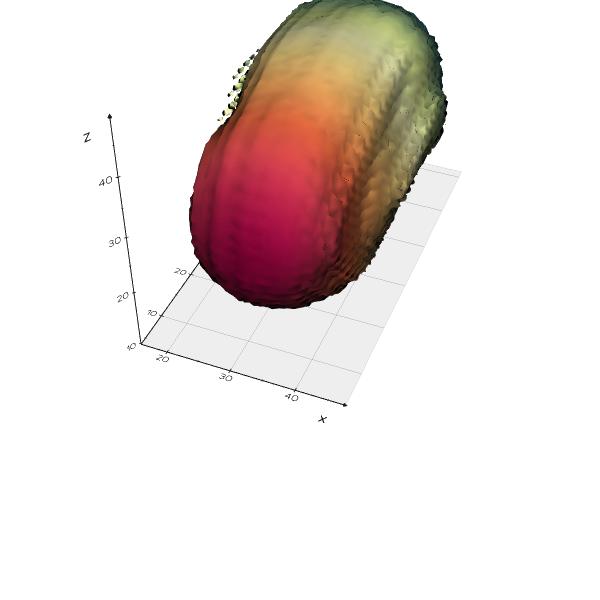

In [9]:
# https://github.com/marrlab/SHAPR_torch/blob/master/shapr/scripts/tif_to_x3d.py
# in this script the volumina isn't exported as x3d file because trying it generated error for some reasons
from vedo import Plotter
from vedo import Volume
from shapr.utils import import_image
from matplotlib import pyplot as plt1

image_data = import_image("Results/cell_frame004185_x0513_y0217_red.tif").squeeze()

def to_x3d(image_data):
    plt = Plotter(size=(600, 600), bg='white', offscreen=False, interactive=True)
    volume = Volume(image_data).isosurface()

    # Add some nice colours based on the y coordinate. This is just for
    # visualisation purposes.
    coords = volume.points()
    volume.cmap('Spectral', coords[:, 1])

    plt.show(volume, axes=1, viewup= "z", interactive = True)

   

to_x3d(image_data)




With the python script "BTHE_3D_Visualization" it is possible to have a 360° video of a predicted cell in an interactive Window